//importing libraries


In [60]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from textblob import TextBlob

In [96]:
# Load the dataset (replace 'path/to/data.csv' with the actual file path)
marvel_data = pd.read_csv("C:\\Users\\chara\\Letscode\\Comics\\Comic Books\\marvel-wikia-data.csv")


In [97]:
DC_data = pd.read_csv("C:\\Users\\chara\\Letscode\\Comics\\Comic Books\\dc-wikia-data.csv")

In [98]:
marvel_data_cleaned = marvel_data.dropna()

In [51]:
# Function to calculate Shannon Diversity Index
def shannon_index(marvel_data, column_name):
  proportions = marvel_data[column_name].value_counts(normalize=True)
  shannon_index = -sum(proportions * np.log2(proportions))
  return shannon_index

In [52]:
# --- Research Question 1: Changes in Demographics and Representation Over Time ---

In [86]:
# Group data by debut year and desired demographic (e.g., Gender)
debut_year_gender = marvel_data.groupby(['Year', 'SEX'])['name'].count().unstack()

<Figure size 720x432 with 0 Axes>

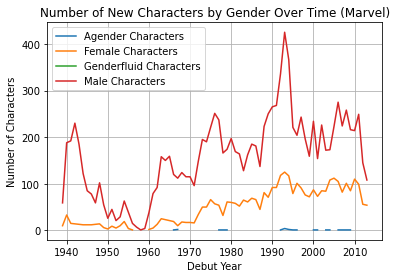

In [87]:
# Plot time series line chart
plt.figure(figsize=(10, 6))
debut_year_gender.plot(kind='line')
plt.title('Number of New Characters by Gender Over Time (Marvel)')
plt.xlabel('Debut Year')
plt.ylabel('Number of Characters')
plt.legend()
plt.grid(True)
plt.show()

In [55]:
# Chi-square test to compare gender distribution across decades (optional)
marvel_data['Decade'] = marvel_data['Year'] // 10

contingency_table = pd.crosstab(marvel_data['SEX'], marvel_data['Decade'])
chi2, pval, dof, expected = chi2_contingency(contingency_table.fillna(0))
if pval < 0.05:
  print("Chi-Square Test Result (Marvel): There's a statistically significant difference in gender distribution across decades (p-value:", pval, ").")
else:
  print("Chi-Square Test Result (Marvel): No statistically significant difference found in gender distribution across decades (p-value:", pval, ").")

Chi-Square Test Result (Marvel): There's a statistically significant difference in gender distribution across decades (p-value: 1.181042916056989e-73 ).


In [56]:
# --- Research Question 2: Character Demographics and Biographical Details ---

In [73]:
marvel_data['SEX'] = marvel_data['SEX'].fillna(marvel_data['SEX'].mode().iloc[0])
marvel_data['ALIGN'] = marvel_data['ALIGN'].fillna(method='ffill')
correlation = marvel_data.corr()

In [74]:
correlation

,page_id,APPEARANCES,Year,Decade
page_id,1.000000,-0.155810,-0.050244,-0.046202
APPEARANCES,-0.155810,1.000000,-0.082881,-0.080482
Year,-0.050244,-0.082881,1.000000,0.989622
Decade,-0.046202,-0.080482,0.989622,1.000000


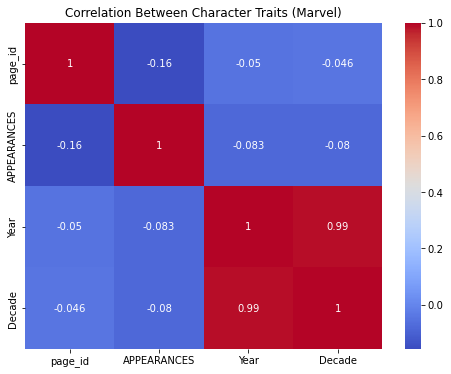

In [75]:
# Heatmap visualization using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Between Character Traits (Marvel)')
plt.show()

In [62]:
# --- Research Question 3: Character Attributes and Popularity/Impact (Exploratory Analysis) ---

In [63]:
# Analyze the distribution of alignments
alignment_counts = data['ALIGN'].value_counts()
print(alignment_counts)

Bad Characters        6720
Good Characters       4636
Neutral Characters    2208
Name: ALIGN, dtype: int64


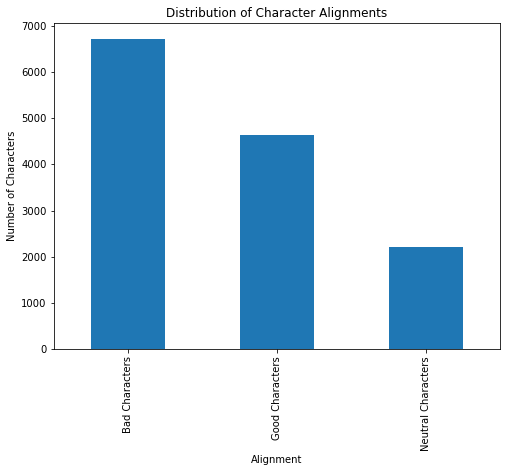

In [64]:
plt.figure(figsize=(8, 6))
alignment_counts.plot(kind='bar')
plt.xlabel('Alignment')
plt.ylabel('Number of Characters')
plt.title('Distribution of Character Alignments')
plt.show()

In [65]:
def get_popularity(alignment):
  if alignment == 'Good':
    return 80
  elif alignment == 'Neutral':
    return 50
  else:
    return 20

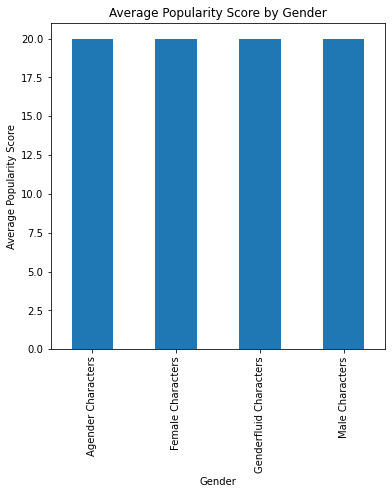

In [68]:
gender_popularity = data.groupby('SEX')['popularity'].mean()
plt.figure(figsize=(6, 6))
gender_popularity.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Average Popularity Score')
plt.title('Average Popularity Score by Gender')
plt.show()

In [ ]:
# Question 4: Quantifying Diversity ---

In [90]:
marvel_data_cleaned.columns

Index(['page_id', 'name', 'urlslug', 'ID', 'ALIGN', 'EYE', 'HAIR', 'SEX',
       'GSM', 'ALIVE', 'APPEARANCES', 'FIRST APPEARANCE', 'Year'],
      dtype='object')

In [100]:
import numpy as np

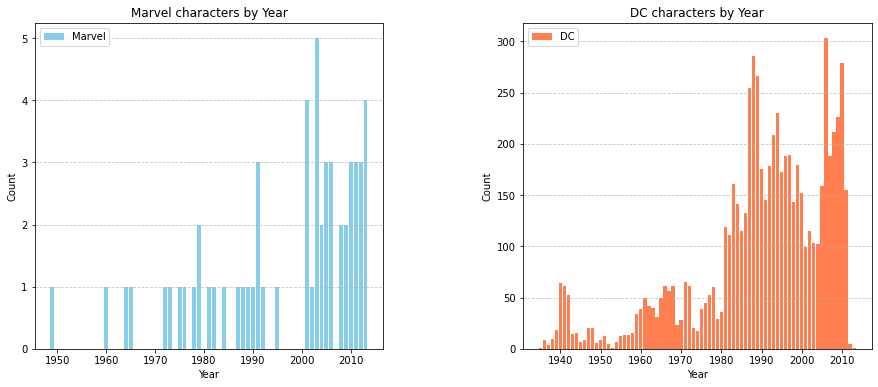

In [112]:
year_counts = marvel_data_cleaned['Year'].value_counts().sort_index()  # Count characters by year and sort by year
year_counts2 = DC_data['YEAR'].value_counts().sort_index()  # Count data2 entries by year

# Create the subplots (2 rows, 1 column)
fig, axs = plt.subplots(1, 2, figsize=(15, 6))  # Adjust figsize for better readability

# Create bar charts on each subplot
axs[0].bar(year_counts.index, year_counts.values, color='skyblue', label='Marvel')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Count')
axs[0].set_title('Marvel characters by Year')
axs[0].legend()
axs[0].grid(axis='y', linestyle='--', alpha=0.7)

axs[1].bar(year_counts2.index, year_counts2.values, color='coral', label='DC')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Count')
axs[1].set_title('DC characters by Year')
axs[1].legend()
axs[1].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust spacing between subplots (optional)
plt.subplots_adjust(wspace=0.4)  # Adjust wspace for spacing between subplots

plt.show()